# Ajuste del modelo

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('datos/df_codificado_completo.csv', index_col=0)

In [3]:
df.head()

,Agency Type,Claim,Duration,Net Sales,Commision (in value),Age,product_2 way Comprehensive Plan,product_Basic Plan,product_Cancellation Plan,product_Rental Vehicle Excess Insurance,...,destination_HONG KONG,destination_INDONESIA,destination_JAPAN,destination_MALAYSIA,destination_PHILIPPINES,destination_SINGAPORE,destination_THAILAND,destination_UNITED STATES,destination_VIET NAM,destination_otros
21,1,0,12,46.15,11.54,44,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,1,0,7,17.55,4.39,25,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23,1,1,12,94.00,23.50,34,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26,0,0,29,9.90,5.94,33,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27,0,0,28,9.90,5.94,33,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Ajuste: 1.Para los datos codificados sin balancear:

Se separan los datos:

In [4]:
X1 = df.drop("Claim", axis = 1) #Separamos los datos  
y1 = df["Claim"]

In [5]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [6]:
# definición de la regresión logistica

log_reg_sinbalan = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajuste del modelo
log_reg_sinbalan.fit(x_train1,y_train1)

# predicciones para el conjunto de entrenamiento
y_pred_train_sinbalan = log_reg_sinbalan.predict(x_train1)

# predicciones para el conjunto de test
y_pred_test_sinbalan = log_reg_sinbalan.predict(x_test1)

In [7]:
train_df_sinsmot = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_sinbalan, 'Set': ['Train']*len(y_train1)})
test_df_sinsmot  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_sinbalan,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_sinsmot,test_df_sinsmot], axis = 0)
resultados.head()

,Real,Predicted,Set
12905,0,0,Train
34745,1,0,Train
16553,0,0,Train
15287,0,0,Train
25064,0,0,Train


### Ajuste: 2.Para los datos codificados y balanceados:

In [8]:
df2 = pd.read_csv('datos/df_codificado_balanceado.csv', index_col=0)

In [9]:
df2.head()

,Agency Type,Duration,Net Sales,Commision (in value),Age,product_2 way Comprehensive Plan,product_Basic Plan,product_Cancellation Plan,product_Rental Vehicle Excess Insurance,product_otros_productos,...,destination_INDONESIA,destination_JAPAN,destination_MALAYSIA,destination_PHILIPPINES,destination_SINGAPORE,destination_THAILAND,destination_UNITED STATES,destination_VIET NAM,destination_otros,Claim
0,1,8,37.5,9.38,28,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,9,26.0,9.10,51,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,13,26.0,9.10,42,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,19,17.0,4.25,35,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,6,49.5,29.70,48,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
# separación de los datos

X2 = df2.drop("Claim", axis = 1)
y2 = df2["Claim"]

In [11]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [12]:
# definición de la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test2)

In [13]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head()

,Real,Predicted,Set
31479,1,1,Train
34842,1,1,Train
27031,1,1,Train
37290,1,1,Train
2269,0,0,Train


## Matriz de confusión: 1. Para datos codificados sin balancear:

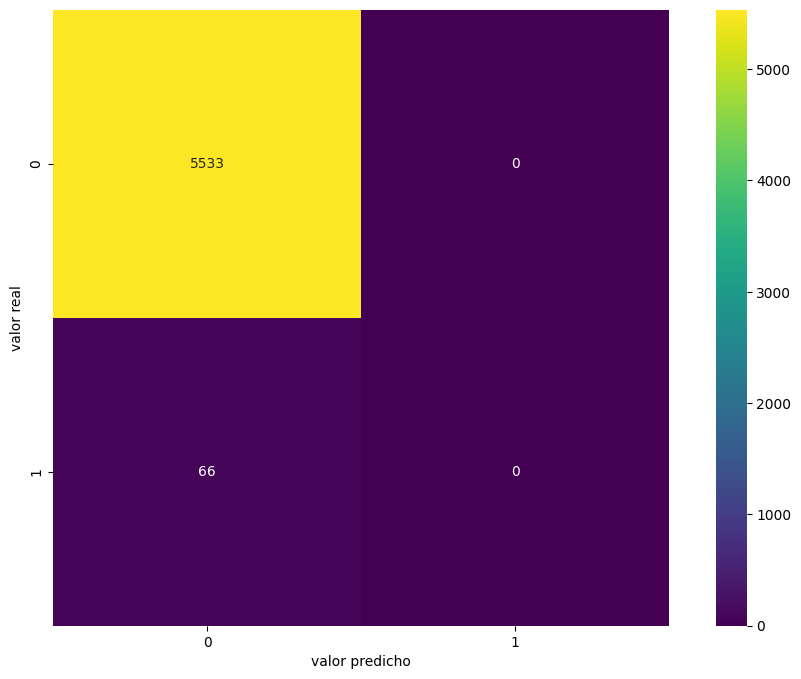

In [14]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_sinbalan)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Los que reclaman es un 1, los que no un 0:

- Para lo que no reclaman, acierta 5533 veces.
- Para los que reclama no acierta, 0 veces.
- Tenemos 66 falsos no reclamantes, que no iban a reclamar y sí han reclamado.
- 0 falsos que sí  iban a reclamar según nuestras predicciones y  no han reclamado.

El modelo funciona genial para los que  no reclaman, pero falla totalmente para los que sí.


## Matriz de confusión: 2. Para datos codificados y balanceados:

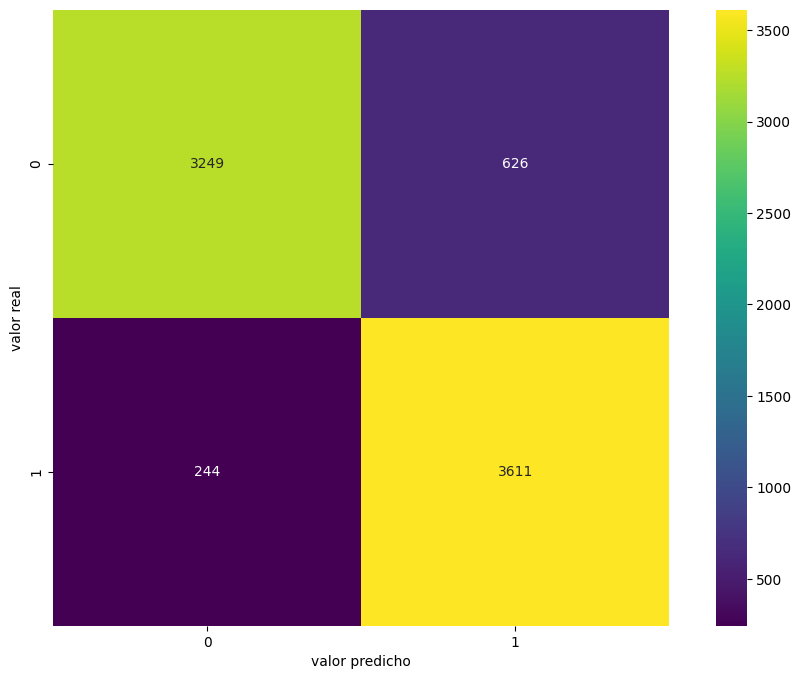

In [15]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Los que reclaman es un 1, los que no un 0:

- Para lo que no reclaman, acierta 3227 veces (Verdaderos positivos)
- Para los que reclama acierta, 3740 veces (Verdadero negativo)
- Tenemos 177 falsos no reclamantes, que no iban a reclamar y sí han reclamado (Falsos positivos)
- 588 falsos que sí  iban a reclamar según nuestras predicciones y  no han reclamado (Falsos negativos)

